# Teleport

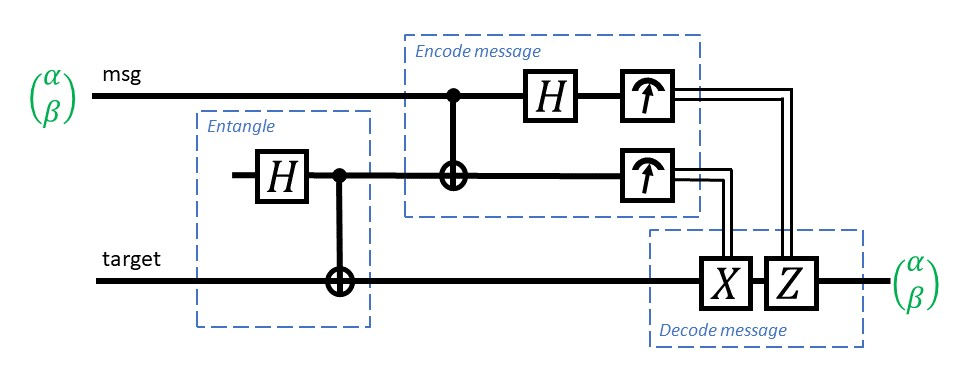

Quantum teleportation provides a way of moving a quantum state from one
location  to another without having to move physical particle(s) along
with it. This is done with the help of previously shared quantum
entanglement between the sending and the receiving locations and
classical communication.
 
To see how to implement this in Q#, we first define a `Teleport` Q# operation that transfers the state of one qubit
into another:

In [1]:
/// # Summary
/// Sends the state of one qubit to a target qubit by using
/// teleportation.
/// 
/// Notice that after calling Teleport, the state of `msg` is
/// collapsed.
///
/// # Input
/// ## msg
/// A qubit whose state we wish to send.
/// ## target
/// A qubit initially in the |0〉 state that we want to send
/// the state of msg to.
operation Teleport (msg : Qubit, target : Qubit) : Unit {

    using (register = Qubit()) {
        // Create some entanglement that we can use to send the message.
        H(register);
        CNOT(register, target);

        // Encode the message into the entangled pair,
        // and measure the qubits to extract the classical data
        // we need to correctly decode the message into the target qubit:
        CNOT(msg, register);
        H(msg);
        let data1 = M(msg);
        let data2 = M(register);

        // decode the message by applying the corrections on
        // the target qubit accordingly:
        if (data1 == One) { Z(target); }
        if (data2 == One) { X(target); }

        // Reset our "register" qubit before releasing it.
        Reset(register);
    }
}


Teleport

Note that the state of the original qubit is destroyed when we perform a measurement on it, so the `Teleport` Q# operation does not violate the [non-cloning theorem](https://docs.microsoft.com/quantum/concepts/pauli-measurements#the-no-cloning-theorem).


We can then show how to move a random quantum state
(for this sample, either |+> or |->) using `Teleport`without loosing any state information:

In [2]:
open Microsoft.Quantum.Samples.Teleportation;

/// # Summary
/// Uses teleportation to send a randomly picked |-> or |+> state
/// to another.
operation TeleportRandomMessage () : Unit {

    using (qubits = Qubit[2]) {

        // Ask for some qubits that we can use to teleport.
        let msg = qubits[0];
        let target = qubits[1];

        PrepareRandomMessage(msg);

        // Use the operation we defined above.
        Teleport(msg, target);

        // Report message received:
        if (IsPlus(target))  { Message("Received |+>"); }
        if (IsMinus(target)) { Message("Received |->"); }

        // Reset all of the qubits that we used before releasing
        // them.
        ResetAll(qubits);
    }
}

TeleportRandomMessage

Notice `TeleportRandomMessage` uses some operations defined in the Notebooks workspace. To get the  complete list of workspace operations use the `%workspace` command:

In [3]:
%workspace

Microsoft.Quantum.Samples.Teleportation.IsMinus, Microsoft.Quantum.Samples.Teleportation.IsPlus, Microsoft.Quantum.Samples.Teleportation.PrepareRandomMessage, Microsoft.Quantum.Samples.Teleportation.SetToMinus, Microsoft.Quantum.Samples.Teleportation.SetToPlus, Microsoft.Quantum.Samples.Teleportation.Teleport, Microsoft.Quantum.Samples.Teleportation.TeleportClassicalMessage, Microsoft.Quantum.Samples.Teleportation.TeleportRandomMessage

You can get the documentation of each operation by using the `?` magic:

In [4]:
Microsoft.Quantum.Samples.Teleportation.PrepareRandomMessage?

Microsoft.Quantum.Samples.Teleportation.PrepareRandomMessage

Finally, use `%simulate` to run the `TeleportRandomMessage` operation using the `QuantumSimulator`:

In [5]:
%simulate TeleportRandomMessage

Sending |+>
Received |+>


()

In [6]:
%version

Component,Version
iqsharp,0.5.1903.2702
Jupyter Core,1.1.12077.0
